<a href="https://colab.research.google.com/github/kannavdhawan/Time_series_stocks_LSTM/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import StandardScaler 


import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt 


url='https://raw.githubusercontent.com/kannavdhawan/Time_series_stocks_LSTM/master/q2_dataset.csv?token=AHMAKJAQPICJFWARH35B4US7DEIJE'
df=pd.read_csv(url)

In [101]:
df

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91
...,...,...,...,...,...,...
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21


In [102]:
df=pd.concat([df.iloc[:,0],df.iloc[:,2:]],axis=1)

In [103]:
df.head(7)

,Date,Volume,Open,High,Low
0,07/08/20,29272970,376.72,381.50,376.36
1,07/07/20,28106110,375.41,378.62,372.23
2,07/06/20,29663910,370.00,375.78,369.87
3,07/02/20,28510370,367.85,370.47,363.64
4,07/01/20,27684310,365.12,367.36,363.91
5,06/30/2020,35055820,360.08,365.98,360.00
6,06/29/2020,32661520,353.25,362.17,351.28


In [104]:
df['Date']=pd.to_datetime(df.Date)
df=df.sort_index(ascending=False)

In [105]:
df=df.iloc[:,1:].values.astype('float32')

In [106]:
df

array([[7.829151e+07, 1.238500e+02, 1.240600e+02, 1.192200e+02],
       [6.129280e+07, 1.219400e+02, 1.238500e+02, 1.212100e+02],
       [4.136560e+07, 1.250300e+02, 1.257600e+02, 1.243200e+02],
       ...,
       [2.966391e+07, 3.700000e+02, 3.757800e+02, 3.698700e+02],
       [2.810611e+07, 3.754100e+02, 3.786200e+02, 3.722300e+02],
       [2.927297e+07, 3.767200e+02, 3.815000e+02, 3.763600e+02]],
      dtype=float32)

In [107]:
# scaler=MinMaxScaler(feature_range=(0,1))
# df=scaler.fit_transform(df)

In [108]:
df.shape

(1259, 4)

In [109]:
a=df[0:4,:]
a

array([[7.829151e+07, 1.238500e+02, 1.240600e+02, 1.192200e+02],
       [6.129280e+07, 1.219400e+02, 1.238500e+02, 1.212100e+02],
       [4.136560e+07, 1.250300e+02, 1.257600e+02, 1.243200e+02],
       [3.169587e+07, 1.260400e+02, 1.263700e+02, 1.250400e+02]],
      dtype=float32)

In [110]:
#To change taken from website ........

def univariate_data(data_set_df):
  data = []
  labels = []
  history_size=3
  
  for i in range(history_size, len(data_set_df)):
    indices = data_set_df[i-history_size : i, :]
    
    data.append(indices)
    labels.append(data_set_df[i][1])
  return data,labels
X,y=univariate_data(df)

In [111]:
np.asarray(X).shape

(1256, 3, 4)

In [112]:
np.asarray(y).shape

(1256,)

In [113]:
ls=list(zip(X,y))

In [114]:
random.shuffle(ls)

In [115]:
train,test=train_test_split(pd.DataFrame(ls),test_size=0.3)

In [116]:
train.shape

(879, 2)

In [117]:
test.shape

(377, 2)

In [118]:
train.head()

,0,1
402,"[[17352380.0, 184.1, 186.21, 183.8], [22551660...",187.789993
337,"[[31384720.0, 167.41, 171.66, 167.28], [360545...",172.399994
238,"[[36792100.0, 113.87, 115.21, 113.45], [263789...",111.400002
203,"[[35407050.0, 94.94, 96.35, 94.68], [29124140....",92.910004
1052,"[[20393070.0, 189.01, 189.53, 187.86], [236390...",188.000000


In [119]:
test.head()

,0,1
228,"[[21847230.0, 261.55, 262.79, 260.92], [258175...",263.679993
499,"[[21175670.0, 156.91, 157.55, 155.27], [169166...",163.889999
34,"[[26178840.0, 110.23, 110.98, 109.2], [3173581...",108.970001
216,"[[25328680.0, 109.1, 109.37, 108.34], [2191834...",108.860001
1102,"[[38116290.0, 167.81, 171.75, 166.9], [3742564...",164.880005


In [120]:
X_train=train[0].tolist()

In [121]:
X_train[0]

array([[1.735238e+07, 1.841000e+02, 1.862100e+02, 1.838000e+02],
       [2.255166e+07, 1.862900e+02, 1.871900e+02, 1.829100e+02],
       [1.767521e+07, 1.838200e+02, 1.873000e+02, 1.834200e+02]],
      dtype=float32)

In [122]:
X_test=test[0].tolist()

In [123]:
X_test[0]

array([[2.184723e+07, 2.615500e+02, 2.627900e+02, 2.609200e+02],
       [2.581759e+07, 2.611300e+02, 2.647800e+02, 2.610700e+02],
       [2.239556e+07, 2.637500e+02, 2.648800e+02, 2.621000e+02]],
      dtype=float32)

In [124]:
#labels
y_train=train[1]
y_train=y_train.reset_index(drop=True)

In [125]:
y_test=test[1]
y_test=y_test.reset_index(drop=True)

In [126]:
# X_train=np.asarray(X_train)
# X_test=np.asarray(X_test)

In [127]:
train=[list(np.asarray(item).ravel()) for item in X_train]
test=[list(np.asarray(item).ravel()) for item in X_test]

In [128]:
y_train

0      187.789993
1      172.399994
2      111.400002
3       92.910004
4      188.000000
          ...    
874    257.260010
875    323.350006
876    116.040001
877    138.779999
878    324.660004
Name: 1, Length: 879, dtype: float64

In [129]:
train_df=pd.DataFrame(train)

In [130]:
test_df=pd.DataFrame(test)

In [131]:
train_df['Target']=pd.DataFrame(y_train)
test_df['Target']=pd.DataFrame(y_test)

In [132]:
train_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,Target
0,17352380.0,184.100006,186.210007,183.800003,22551660.0,186.289993,187.190002,182.910004,17675210.0,183.820007,187.300003,183.419998,187.789993
1,31384720.0,167.410004,171.660004,167.279999,36054568.0,172.860001,175.080002,172.350006,28204640.0,174.649994,175.570007,172.850006,172.399994


In [133]:
test_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,Target
0,21847230.0,261.549988,262.790009,260.920013,25817590.0,261.130005,264.779999,261.070007,22395560.0,263.750000,264.880005,262.100006,263.679993
1,21175670.0,156.910004,157.550003,155.270004,16916650.0,157.229996,157.830002,156.779999,44387768.0,159.289993,163.600006,158.699997,163.889999


In [134]:
train_df.to_csv("train_data_RNN.csv")
test_df.to_csv("test_data_RNN.csv")

In [135]:
train_df=pd.read_csv("train_data_RNN.csv")

train_df=train_df.iloc[:,1:]
# test_df=pd.read_csv("test_data_RNN.csv")
# test_df=test_df.iloc[:,1:]

In [136]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Target
0,17352380.0,184.100006,186.210007,183.800003,22551660.0,186.289993,187.190002,182.910004,17675210.0,183.820007,187.300003,183.419998,187.789993
1,31384720.0,167.410004,171.660004,167.279999,36054568.0,172.860001,175.080002,172.350006,28204640.0,174.649994,175.570007,172.850006,172.399994
2,36792100.0,113.870003,115.209999,113.449997,26378910.0,113.650002,114.230003,113.199997,43403760.0,113.459999,113.769997,110.529999,111.400002
3,35407048.0,94.940002,96.349998,94.680000,29124140.0,96.250000,96.889999,95.349998,32042290.0,95.940002,96.290001,95.250000,92.910004
4,20393070.0,189.009995,189.529999,187.860001,23639070.0,186.779999,187.070007,185.100006,19046600.0,186.070007,188.460007,186.000000,188.000000


In [137]:

# test_df.head()

In [138]:
train_df=pd.DataFrame(train_df)

In [139]:
X_train=train_df.iloc[:,0:-1]
y_train=train_df.iloc[:,12]

# x_test=test_df.iloc[:,0:-1]
# y_test=test_df.iloc[:,12]

In [140]:
X_scaler=MinMaxScaler(feature_range=(0,1))
y_scaler=MinMaxScaler(feature_range=(0,1))

X_train=X_scaler.fit_transform(X_train)
y_train=y_scaler.fit_transform(np.asarray(y_train).reshape(-1,1))

In [141]:
# X_train.head()    

In [142]:
# y_train.head()

In [143]:
X_train_np=np.asarray(X_train).reshape(879,3,4)

In [144]:
X_train_np.shape

(879, 3, 4)

In [145]:
# simple_lstm_model= Sequential([LSTM(8, input_shape=(3,4)),Dense(1)])
# simple_lstm_model.compile(optimizer='adam', loss='mae')

In [146]:
# model = Sequential()
# model.add(LSTM(12, input_shape=(3,4)))
# model.add(LSTM(12, input_shape=(3,4)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

In [147]:
# regressor = Sequential()

# regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (3,4)))
# regressor.add(Dropout(0.4))

# regressor.add(LSTM(units = 100, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))


# regressor.add(Dense(units = 1))

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [148]:
# regressor = Sequential()

# regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (3,4)))
# regressor.add(Dropout(0.4))

# regressor.add(LSTM(units = 100, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))


# regressor.add(Dense(units = 10))
# regressor.add(Dense(units = 1))

# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [149]:
regressor = Sequential()
#46 neurons will be used at this layer
regressor.add(LSTM(64, input_shape=(3,4)))
#output layer contains 1 neuron to predict the output
regressor.add(Dense(1))
#as the data is continous, hence loss function is mean_squared_error
regressor.compile(loss='mean_squared_error', optimizer='sgd')

In [150]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [151]:
# y_train

In [152]:

regressor.fit(X_train_np, y_train, epochs=100, batch_size=5, verbose=2)
# make predictions
trainPredict = regressor.predict(X_train_np)
#testPredict = model.predict(X_test)

Epoch 1/100
176/176 - 0s - loss: 0.0264
Epoch 2/100
176/176 - 1s - loss: 0.0109
Epoch 3/100
176/176 - 0s - loss: 0.0056
Epoch 4/100
176/176 - 0s - loss: 0.0028
Epoch 5/100
176/176 - 0s - loss: 0.0014
Epoch 6/100
176/176 - 0s - loss: 7.8709e-04
Epoch 7/100
176/176 - 0s - loss: 4.8569e-04
Epoch 8/100
176/176 - 0s - loss: 3.4811e-04
Epoch 9/100
176/176 - 1s - loss: 2.8788e-04
Epoch 10/100
176/176 - 1s - loss: 2.5940e-04
Epoch 11/100
176/176 - 0s - loss: 2.4744e-04
Epoch 12/100
176/176 - 0s - loss: 2.4189e-04
Epoch 13/100
176/176 - 0s - loss: 2.3897e-04
Epoch 14/100
176/176 - 0s - loss: 2.3799e-04
Epoch 15/100
176/176 - 0s - loss: 2.3563e-04
Epoch 16/100
176/176 - 0s - loss: 2.3576e-04
Epoch 17/100
176/176 - 0s - loss: 2.3494e-04
Epoch 18/100
176/176 - 0s - loss: 2.3345e-04
Epoch 19/100
176/176 - 0s - loss: 2.3346e-04
Epoch 20/100
176/176 - 1s - loss: 2.3320e-04
Epoch 21/100
176/176 - 0s - loss: 2.3290e-04
Epoch 22/100
176/176 - 0s - loss: 2.3271e-04
Epoch 23/100
176/176 - 0s - loss: 2.318

In [153]:
print(type(trainPredict))
print(trainPredict.shape)
print(type(y_train))
print(len(y_train))

<class 'numpy.ndarray'>
(879, 1)
<class 'numpy.ndarray'>
879


In [154]:
# invert predictions
trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform(y_train)

# testPredict = scaler.inverse_transform(testPredict) 
# testY = scaler.inverse_transform([testY])

In [155]:
print(trainPredict[0])
print(trainY[0])

[186.94986]
[187.78999329]


In [156]:

# calculate root mean squared error
trainScore =mean_squared_error(trainY, trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

Train Score: 18.05 MSE


In [157]:
# import pickle 
# with open("saved_model.pkl",'w') as f:
#   pickle.dump(regressor,f)

In [158]:
# pickle.dump(regressor, open("final_weights.p", "wb" ))

In [159]:
regressor.save('my_model.h5') 

In [160]:
loaded_model=load_model('my_model.h5')

In [161]:
# Testing file 

In [162]:
test_df=pd.read_csv("test_data_RNN.csv")
test_df=test_df.iloc[:,1:]
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Target
0,21847230.0,261.549988,262.790009,260.920013,25817590.0,261.130005,264.779999,261.070007,22395560.0,263.750000,264.880005,262.100006,263.679993
1,21175670.0,156.910004,157.550003,155.270004,16916650.0,157.229996,157.830002,156.779999,44387768.0,159.289993,163.600006,158.699997,163.889999
2,26178840.0,110.230003,110.980003,109.199997,31735810.0,109.949997,110.419998,108.120003,23553790.0,108.910004,109.769997,108.169998,108.970001
3,25328680.0,109.099998,109.370003,108.339996,21918340.0,109.230003,109.599998,109.019997,25108890.0,108.769997,109.690002,108.360001,108.860001
4,38116288.0,167.809998,171.750000,166.899994,37425640.0,167.880005,168.940002,164.470001,30237640.0,167.639999,168.750000,164.880005,164.880005


In [163]:
x_test=test_df.iloc[:,0:-1]
y_test=test_df.iloc[:,12]

In [164]:
X_scaler_test=MinMaxScaler(feature_range=(0,1))
y_scaler_test=MinMaxScaler(feature_range=(0,1))

x_test=X_scaler_test.fit_transform(x_test)
y_test=y_scaler_test.fit_transform(np.asarray(y_test).reshape(-1,1))

In [165]:
x_test_np=np.asarray(x_test).reshape(377,3,4)

In [166]:
y_pred=loaded_model.predict(x_test_np)

In [167]:
testPredict = y_scaler_test.inverse_transform(y_pred) 
testY = y_scaler.inverse_transform(y_test)

In [168]:
print(testPredict[0])
print(testY[0])


[264.22726]
[261.73672733]


In [169]:
# calculate root mean squared error
testScore =mean_squared_error(testY, testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

Test Score: 27.00 MSE


## PLots

Text(0, 0.5, 'Variation')

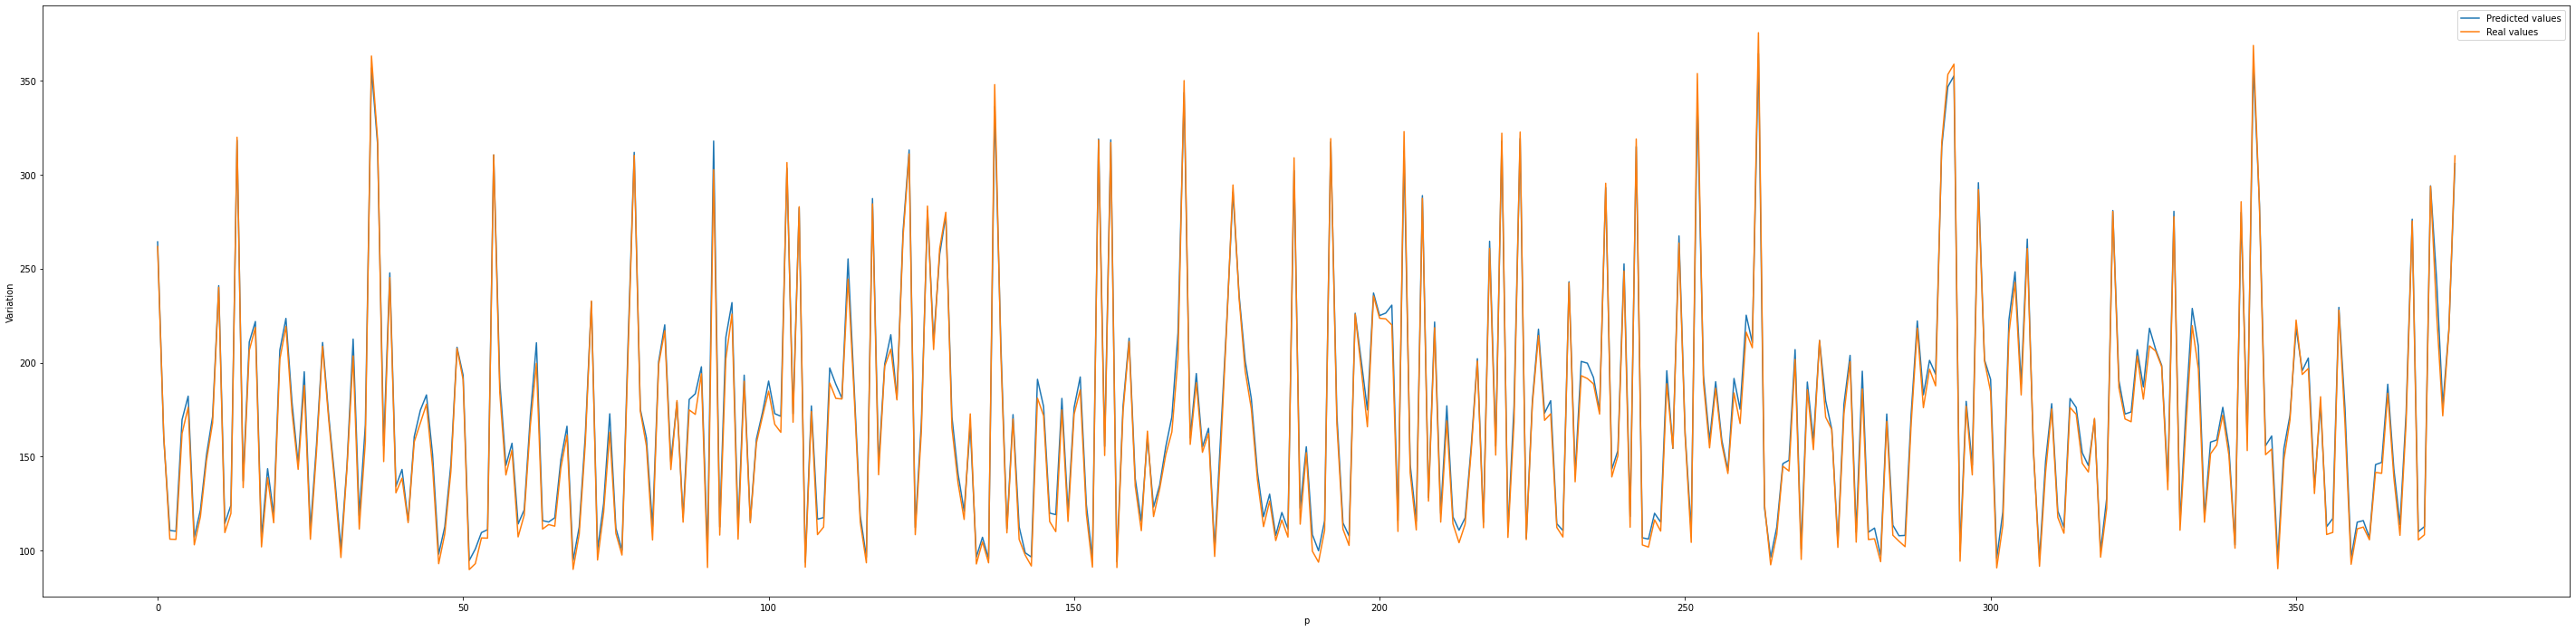

In [180]:
plt.figure(figsize=(50,12))
plt.plot(testPredict)
plt.plot(testY)
plt.legend(["Predicted values","Real values"])
plt.xlabel("p")
plt.ylabel("Variation")